# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [663]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [664]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';' )
display(azdias)

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')
display(feat_info)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [665]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print (azdias.shape)
print (feat_info.shape)
azdias.head()

(891221, 85)
(85, 4)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [666]:
#azdias.describe()

In [667]:
azdias.head(10).T

,0,1,2,3,4,5,6,7,8,9
AGER_TYP,-1,-1,-1,2,-1,3,-1,-1,-1,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

MY OBSERVATION:.........................................................................................................

After observing Udacity_AZDIAS_Subset.csv, AZDIAS_Feature_Summary.csv and reading Data_Dictionary.md we can say that the Udacity_AZDIAS_Subset.csv needs to be cleaned, i.e. to replace the missing values like -1, unknowns 0 and also unknowns XX and X with NaN.

Erase the braces from the ZDIAS_Feature_Summary.csv 's each row output of the missing_or_unknown column and check if it contains 0, -1, X or XX. If it contains any of those values then, check for values in that respective attribute's 891221 values and replace them with NaN. 


In [668]:
# Identify missing or unknown data values and convert them to NaNs.
find_nan = azdias.isnull().sum()
find_nan

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [669]:
print("total number of NaN's that already exist before cleaning operation are:", sum(find_nan))

total number of NaN's that already exist before cleaning operation are: 4896838


In [670]:
feat_info.shape[0]

85

In [671]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [672]:
#erase the [, ], and convert them into string list
missing_or_unknown_list = []

for indx in range(0,feat_info.shape[0]):
    missing_or_unknown = feat_info.iloc[indx]['missing_or_unknown']
    #print(missing_or_unknown)
    missing_or_unknown = missing_or_unknown.replace('[', '').replace(']', '').split(',')
    #print(missing_or_unknown)
    missing_or_unknown_list.append(missing_or_unknown)
    
#display(missing_or_unknown_list)    

In [673]:
#convert the numbers to float
for i in range (len(missing_or_unknown_list)):
    for j in range (len(missing_or_unknown_list[i])):
        #float cannot convert '', 'X' or 'XX' to float so have to skip it. However we will need it in replacing
        if (missing_or_unknown_list[i][j] == '' or missing_or_unknown_list[i][j] == 'X' or missing_or_unknown_list[i][j] == 'XX'): 
            pass
        else: 
            missing_or_unknown_list[i][j] = float(missing_or_unknown_list[i][j]) 

#display (missing_or_unknown_list)

In [674]:
#replace the missing_or_unknown values in azdias to NaN by using pd.replace(self, to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')

for i in range(0,len(missing_or_unknown_list)): 
    column = feat_info.iloc[i]['attribute'] 
    azdias[column].replace(to_replace = missing_or_unknown_list[i], value = np.NaN, regex = True, inplace = True)

In [675]:
#azdias.head(20).T

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [676]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
find_nan_final = azdias.isnull().sum()
print("Total num of NaN's after cleaning",sum(find_nan_final))
find_nan_final

find_nan_final_dataframe = pd.DataFrame(find_nan_final, columns = ['Nans after cleaning'])
display(find_nan_final_dataframe)


Total num of NaN's after cleaning 8146229


,Nans after cleaning
AGER_TYP,677503
ALTERSKATEGORIE_GROB,0
ANREDE_KZ,0
CJT_GESAMTTYP,4854
FINANZ_MINIMALIST,0
FINANZ_SPARER,0
FINANZ_VORSORGER,0
FINANZ_ANLEGER,0
FINANZ_UNAUFFAELLIGER,0
FINANZ_HAUSBAUER,0


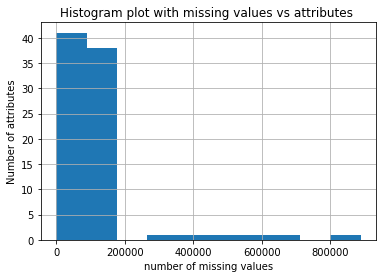

In [677]:
#plt.hist(find_nan_final, bins=10)
find_nan_final.hist(bins = 10)
plt.title('Histogram plot with missing values vs attributes ')
plt.xlabel('number of missing values')
plt.ylabel('Number of attributes')
plt.show()

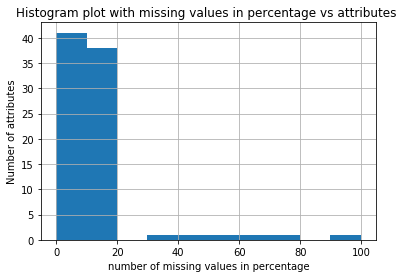

In [678]:
find_nan_final_percent = find_nan_final/(azdias.shape[0]/100)
#display (find_nan_final_percent)
find_nan_final_percent.hist(bins = 10)
plt.title('Histogram plot with missing values in percentage vs attributes ')
plt.xlabel('number of missing values in percentage')
plt.ylabel('Number of attributes')
plt.show()

MY OBSERVATION:.........................................................................................................

The above two histogram plots say that there are about 0-5 attributes which contain missing values of more than 800000. Considering that there are 891221 data points in total, missing 800000 is massive. i.e. some 0-5 attributes have about 90% of  missing values. Lets have a look at those attibutes and drop them.

Text(0.5,1,'attributes with less than 1% of missing values')

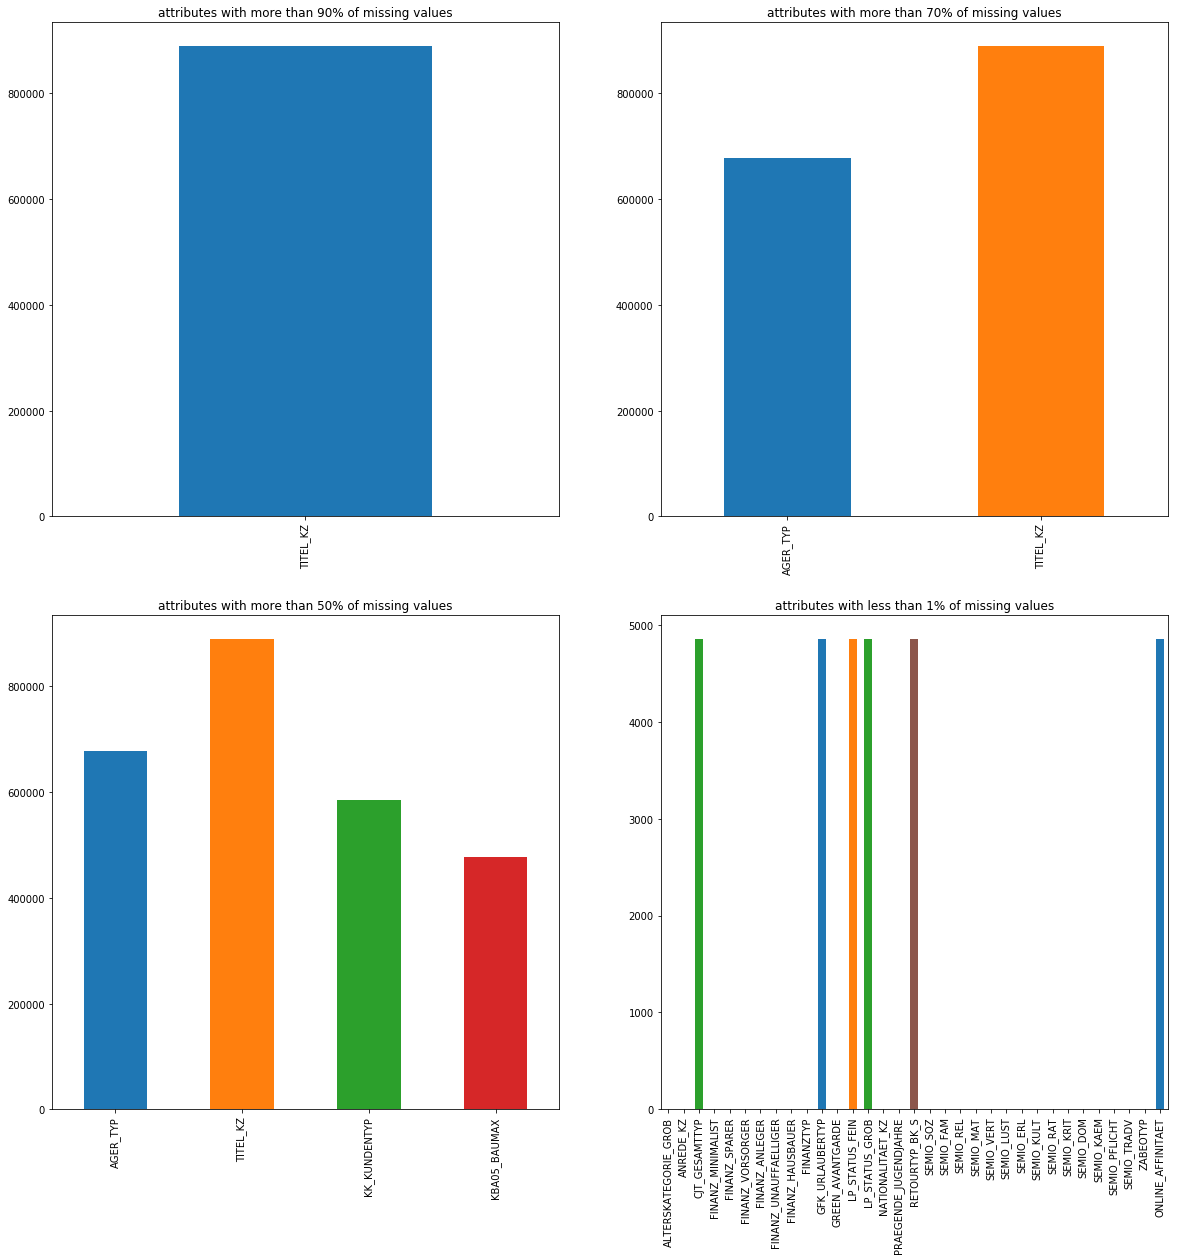

In [679]:
#check those attributes with 80% of missing values

missing_attributes_90 = find_nan_final[find_nan_final >= 0.9*azdias.shape[0]]
missing_attributes_70 = find_nan_final[find_nan_final >= 0.7*azdias.shape[0]]
missing_attributes_50 = find_nan_final[find_nan_final >= 0.5*azdias.shape[0]]
missing_attributes_1 = find_nan_final[find_nan_final <= 0.01*azdias.shape[0]]

plt.subplot(2,2,1)
missing_attributes_90.plot.bar(figsize=(10,10))
plt.title('attributes with more than 90% of missing values')

plt.subplot(2,2,2)
missing_attributes_70.plot.bar(figsize=(10,10))
plt.title('attributes with more than 70% of missing values')

plt.subplot(2,2,3)
missing_attributes_50.plot.bar(figsize=(10,10))
plt.title('attributes with more than 50% of missing values')

plt.subplot(2,2,4)
missing_attributes_1.plot.bar(figsize=(20,20))
plt.title('attributes with less than 1% of missing values')

In [680]:
#checking the attributes with zero missing values
missing_attributes_0 = find_nan_final[find_nan_final == 0]
print(missing_attributes_0)
print('Attributes with zero missing values are:',len(missing_attributes_0))

ALTERSKATEGORIE_GROB     0
ANREDE_KZ                0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
FINANZTYP                0
GREEN_AVANTGARDE         0
NATIONALITAET_KZ         0
PRAEGENDE_JUGENDJAHRE    0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT            0
SEMIO_TRADV              0
ZABEOTYP                 0
dtype: int64
Attributes with zero missing values are: 27


In [681]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)    
attributes_to_drop = find_nan_final_dataframe[find_nan_final_dataframe['Nans after cleaning'] > 0.3*azdias.shape[0]]
attributes_to_drop = attributes_to_drop.transpose()
display(attributes_to_drop)
print(attributes_to_drop.columns.values)

print ('shape before dropping',azdias.shape)
azdias_new = azdias.drop(attributes_to_drop, axis = 1)

#checking if columns were eliminated
print('shape after dropping', azdias_new.shape)
display(azdias_new.head (n=5))

,AGER_TYP,GEBURTSJAHR,TITEL_KZ,ALTER_HH,KK_KUNDENTYP,KBA05_BAUMAX
Nans after cleaning,677503,392318,889061,310267,584612,476524


['AGER_TYP' 'GEBURTSJAHR' 'TITEL_KZ' 'ALTER_HH' 'KK_KUNDENTYP'
 'KBA05_BAUMAX']
shape before dropping (891221, 85)
shape after dropping (891221, 79)


,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In the above cell we have removed 4 attributes because more than 50% of their data contains missing values. lets remove those 4 attributes from feat_info too. 

In [682]:
#Dropping the same attributes from feat_into
print(attributes_to_drop.columns.values.tolist())
print(attributes_to_drop.columns.values)

feat_info_TRUE = feat_info.isin(attributes_to_drop.columns.values.tolist()) 
#display(feat_info_TRUE)

feat_info_new = feat_info.drop(feat_info_TRUE[feat_info_TRUE.attribute == True].index)
#display (feat_info_new) 
feat_info_new

['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
['AGER_TYP' 'GEBURTSJAHR' 'TITEL_KZ' 'ALTER_HH' 'KK_KUNDENTYP'
 'KBA05_BAUMAX']


,attribute,information_level,type,missing_or_unknown
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]
10,FINANZTYP,person,categorical,[-1]


#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

We have dropped four attributes as they have more than 50% of missing values. They are 'AGER_TYP' 'TITEL_KZ', 'KK_KUNDENTYP', and 'KBA05_BAUMAX'.

There are 27 attributes which have zero missing values.
they are,
ALTERSKATEGORIE_GROB     0
ANREDE_KZ                0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
FINANZTYP                0
GREEN_AVANTGARDE         0
NATIONALITAET_KZ         0
PRAEGENDE_JUGENDJAHRE    0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT            0
SEMIO_TRADV              0
ZABEOTYP                 0


Some group of attributes do contain same number of missing values.
example 1: 
PLZ8_ANTG1	116515
PLZ8_ANTG2	116515
PLZ8_ANTG3	116515
PLZ8_ANTG4	116515
PLZ8_BAUMAX	116515
PLZ8_HHZ	116515
PLZ8_GBZ	116515

example 2:
PLZ8_ANTG1	116515
PLZ8_ANTG2	116515
PLZ8_ANTG3	116515
PLZ8_ANTG4	116515
PLZ8_BAUMAX	116515
PLZ8_HHZ	116515
PLZ8_GBZ	116515



#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [683]:
# How much data is missing in each row of the dataset?
find_nan_row =azdias_new.isnull().sum(axis=1)
#find_nan_row

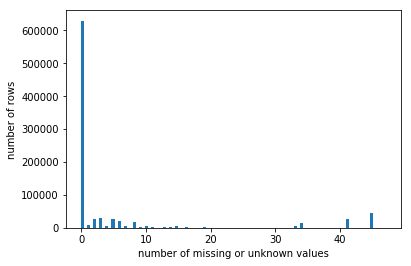

In [684]:
plt.hist(find_nan_row, bins=100)
plt.xlabel('number of missing or unknown values')
plt.ylabel('number of rows')
plt.show()

In [685]:
azdias_lessthan_15 = azdias_new[azdias_new.isnull().sum(axis=1) == 0]
print(len(azdias_lessthan_15)/(azdias_new.shape[0]/100))

70.62614099084291


OBSERVATION............................................

From the above histogram plot we can say that about 600000 rows have only 0-5 missing values. 100000 rows have 50 missing values.

In [686]:
# Write code to divide the data into two subsets based on the number of missing
# let us divide the data into a subset with rows more than 15 missing values and a subset with rows less than 15 missing values.

azdias_lessthan_15 = azdias_new[azdias_new.isnull().sum(axis=1) <= 15]
azdias_morethan_15 = azdias_new[azdias_new.isnull().sum(axis=1) > 15]

print("percentage of data with less than 15 missing values is :", len(azdias_lessthan_15)/(azdias_new.shape[0]/100))
print("percentage of data with more than 15 missing values is :", len(azdias_morethan_15)/(azdias_new.shape[0]/100))

percentage of data with less than 15 missing values is : 88.95043990211182
percentage of data with more than 15 missing values is : 11.049560097888179


In [687]:
columns_with_zero_missing_values = pd.DataFrame(missing_attributes_0, columns = ['Missing zero values'])
display(columns_with_zero_missing_values)


columns_with_no_missing = columns_with_zero_missing_values.index.tolist()

print(columns_with_no_missing)

#print(columns_with_no_missing[:6])


#attributes_to_drop.columns.values.tolist()
#checking the attributes with zero missing values
#missing_attributes_0 = find_nan_final[find_nan_final == 0]
#print(missing_attributes_0)
#print('Attributes with zero missing values are:',len(missing_attributes_0))

,Missing zero values
ALTERSKATEGORIE_GROB,0
ANREDE_KZ,0
FINANZ_MINIMALIST,0
FINANZ_SPARER,0
FINANZ_VORSORGER,0
FINANZ_ANLEGER,0
FINANZ_UNAUFFAELLIGER,0
FINANZ_HAUSBAUER,0
FINANZTYP,0
GREEN_AVANTGARDE,0


['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'GREEN_AVANTGARDE', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP']


In [688]:
def plot_comparision(col):
    fig = plt.figure(figsize=[10,5]) 
    ax1 = fig.add_subplot(121)
    ax1.title.set_text('less than 15 missing values')
    sns.countplot(azdias_lessthan_15[col])
    ax2 = fig.add_subplot(122)
    ax2.title.set_text('more than 15 missing values')
    sns.countplot(azdias_morethan_15[col])                                                  
    fig.suptitle(column)
    plt.show()


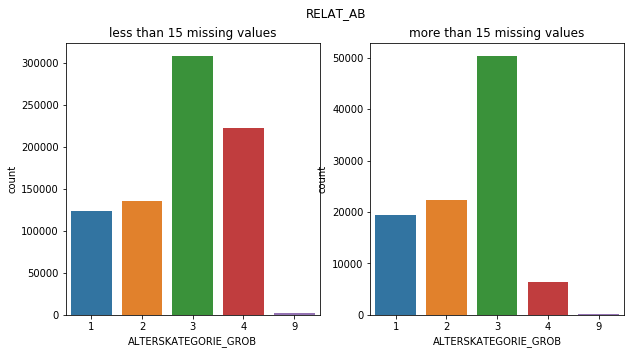

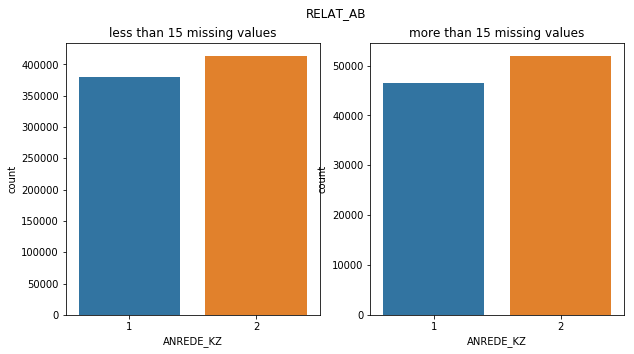

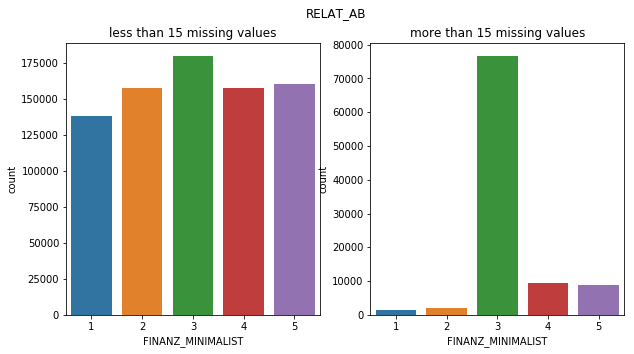

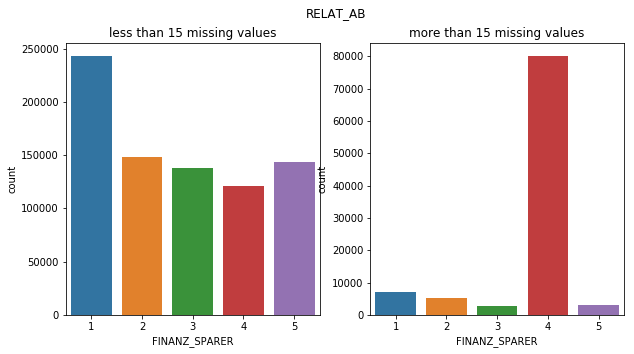

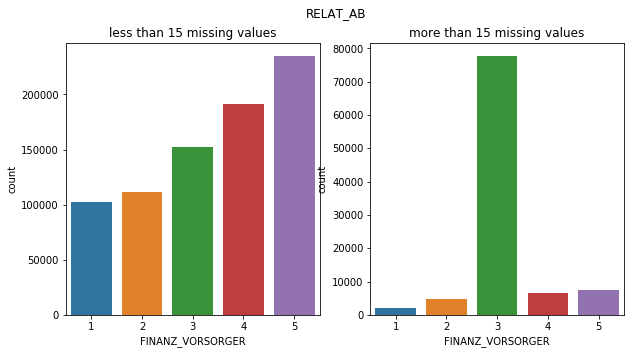

In [689]:
    for col in columns_with_no_missing[:5]:
        plot_comparision(col)

#### Discussion 1.1.3: Assess Missing Data in Each Row

percentage of data with less than 15 missing values is : 88.72299912143005 and 
percentage of data with more than 15 missing values is : 11.277000878569963. so, we can ignore the that 11.28% percent data and go ahead by using 'azdias_lessthan_15'.


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [690]:
# How many features are there of each data type?
feat_info_new.type.value_counts()

ordinal        49
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [691]:
feat_info_new_categorical = feat_info_new[feat_info_new.type == 'categorical']
print('There are {} attributes with categorial as their data type.'.format(len(feat_info_new_categorical)))
display(feat_info_new_categorical)
print(feat_info_new_categorical.attribute.values)

There are 18 attributes with categorial as their data type.


,attribute,information_level,type,missing_or_unknown
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]
21,NATIONALITAET_KZ,person,categorical,"[-1,0]"


['ANREDE_KZ' 'CJT_GESAMTTYP' 'FINANZTYP' 'GFK_URLAUBERTYP'
 'GREEN_AVANTGARDE' 'LP_FAMILIE_FEIN' 'LP_FAMILIE_GROB' 'LP_STATUS_FEIN'
 'LP_STATUS_GROB' 'NATIONALITAET_KZ' 'SHOPPER_TYP' 'SOHO_KZ' 'VERS_TYP'
 'ZABEOTYP' 'GEBAEUDETYP' 'OST_WEST_KZ' 'CAMEO_DEUG_2015' 'CAMEO_DEU_2015']


In [692]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

binary_category = []
multilevel_category=[]

for attr_name in feat_info_new_categorical.attribute.values:
    if (len(azdias_lessthan_15[attr_name].unique())>2):
        multilevel_category.append(attr_name)
    else:
        binary_category.append(attr_name)
        
print('Multilevel_category attributes are \n',multilevel_category)        
print('Binary_category attributes are \n', binary_category)

Multilevel_category attributes are 
 ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
Binary_category attributes are 
 ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'OST_WEST_KZ']


In [693]:
# Re-encode categorical variable(s) to be kept in the analysis.
for attr_name in binary_category:
    print('Unique values in', attr_name, ' are :' , azdias_lessthan_15[attr_name].unique())

Unique values in ANREDE_KZ  are : [2 1]
Unique values in GREEN_AVANTGARDE  are : [0 1]
Unique values in SOHO_KZ  are : [ 1.  0.]
Unique values in OST_WEST_KZ  are : ['W' 'O']


In [694]:
for attr_name in multilevel_category:
    print('Unique values in', attr_name, ' are :' , azdias_lessthan_15[attr_name].unique())

Unique values in CJT_GESAMTTYP  are : [  5.   3.   2.   4.   1.   6.  nan]
Unique values in FINANZTYP  are : [1 6 5 2 4 3]
Unique values in GFK_URLAUBERTYP  are : [ 10.   1.   5.  12.   9.   3.   8.  11.   4.   7.   2.   6.  nan]
Unique values in LP_FAMILIE_FEIN  are : [  5.   1.  nan  10.   2.   7.  11.   8.   4.   6.   9.   3.]
Unique values in LP_FAMILIE_GROB  are : [  3.   1.  nan   5.   2.   4.]
Unique values in LP_STATUS_FEIN  are : [  2.   3.   9.   4.   1.  10.   5.   8.   6.   7.  nan]
Unique values in LP_STATUS_GROB  are : [  1.   2.   4.   5.   3.  nan]
Unique values in NATIONALITAET_KZ  are : [1 3 2 0]
Unique values in SHOPPER_TYP  are : [  3.   2.   1.   0.  nan]
Unique values in VERS_TYP  are : [  2.   1.  nan]
Unique values in ZABEOTYP  are : [5 3 4 1 6 2]
Unique values in GEBAEUDETYP  are : [ 8.  1.  3.  2.  6.  4.  5.]
Unique values in CAMEO_DEUG_2015  are : ['8' '4' '2' '6' '1' '9' '5' '7' '3' nan]
Unique values in CAMEO_DEU_2015  are : ['8A' '4C' '2A' '6B' '8C' '4A' 

In [695]:
#since OST_WEST_KZ has W an O, it can be encoded as 0 and 1
azdias_lessthan_15['OST_WEST_KZ'].replace(['W', 'O'], [1, 0], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [696]:
#verifying the binary category after encoding
for attr_name in binary_category:
    print('Unique values in', attr_name, ' are :' , azdias_lessthan_15[attr_name].unique())

Unique values in ANREDE_KZ  are : [2 1]
Unique values in GREEN_AVANTGARDE  are : [0 1]
Unique values in SOHO_KZ  are : [ 1.  0.]
Unique values in OST_WEST_KZ  are : [1 0]


In [697]:
# Droping all the multi-level features
print(multilevel_category)
print('total number of multilevel_category attributes are:', len(multilevel_category))
print('azdias_lessthan_15\'s shape before dropping', azdias_lessthan_15.shape)
azdias_lessthan_15_encoded = azdias_lessthan_15.drop(multilevel_category, axis = 1)
print('azdias_lessthan_15\'s shape after dropping', azdias_lessthan_15_encoded.shape)

['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
total number of multilevel_category attributes are: 14
azdias_lessthan_15's shape before dropping (792745, 79)
azdias_lessthan_15's shape after dropping (792745, 65)


#### Discussion 1.2.1: Re-Encode Categorical Features

We have encoded the binary values in 'OST_WEST_KZ' to 0, 1 and didn't modify the other binary categories. All the 14 multi_level category attributes were dropped. Thus the attributes came down from 81 to 67.


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)
\


0 1 0 1 0 1 1 0 1 0 1 0 1 0 1


In [698]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
#before creating two variables lets first copy the data into two variables

print('The total number of attributes in azdias_lessthan_15_encoded before modifying PRAEGENDE_JUGENDJAHRE',azdias_lessthan_15_encoded.shape[1])

azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE_Decade'] = azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE']
azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE_Movement'] = azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE']

print('The total number of attributes in azdias_lessthan_15_encoded after modifying PRAEGENDE_JUGENDJAHRE', azdias_lessthan_15_encoded.shape[1])

The total number of attributes in azdias_lessthan_15_encoded before modifying PRAEGENDE_JUGENDJAHRE 65
The total number of attributes in azdias_lessthan_15_encoded after modifying PRAEGENDE_JUGENDJAHRE 67


In [699]:
#creating a Decade variable with 1,2,3,4,5,6 as datapoints
decade_encode = {1:1, 2:1, 
               3:2, 4:2,
               5:3, 6:3, 7:3, 
               8:4, 9:4, 
               10:5, 11:5, 12:5, 13:5,
               14:6, 15:6}

azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE_Decade'].replace(decade_encode, inplace=True)
#replace(['W', 'O'], [1, 0], inplace=True)

In [700]:
movement_encode = {1:0, 3:0, 5:0, 8:0, 10:0, 12:0, 14:0,
                   2:1, 4:1, 6:1, 7:1, 9:1, 11:1, 13:1, 15:1}

azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE_Movement'].replace(movement_encode, inplace=True)

4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown


In [701]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
#before creating two variables lets first copy the data into two variables

print('The total number of attributes in azdias_lessthan_15_encoded before modifying CAMEO_INTL_2015',azdias_lessthan_15_encoded.shape[1])

azdias_lessthan_15_encoded['CAMEO_INTL_2015_Wealth'] = azdias_lessthan_15_encoded['CAMEO_INTL_2015']
azdias_lessthan_15_encoded['CAMEO_INTL_2015_Lifestage'] = azdias_lessthan_15_encoded['CAMEO_INTL_2015']

print('The total number of attributes in azdias_lessthan_15_encoded before modifying CAMEO_INTL_2015',azdias_lessthan_15_encoded.shape[1])


The total number of attributes in azdias_lessthan_15_encoded before modifying CAMEO_INTL_2015 67
The total number of attributes in azdias_lessthan_15_encoded before modifying CAMEO_INTL_2015 69


In [702]:
wealth_encode = {'11':1, '12':1, '13':1, '14':1, '15':1, 
               '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3,
               '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

azdias_lessthan_15_encoded['CAMEO_INTL_2015_Wealth'].replace(wealth_encode, inplace=True)

In [703]:

lifestage_encode = {'11':1, '21':1, '31':1, '41':1, '51':1,
                    '12':2, '22':2, '32':2, '42':2, '52':2,
                    '13':3, '23':3, '33':3, '43':3, '53':3, 
                    '14':4, '24':4, '34':4, '44':4, '54':4,
                    '15':5, '25':5, '35':5, '45':5, '55':5}

azdias_lessthan_15_encoded['CAMEO_INTL_2015_Lifestage'].replace(lifestage_encode, inplace=True)

#### Discussion 1.2.2: Engineer Mixed-Type Features

We have created two variables for PRAEGENDE_JUGENDJAHRE as PRAEGENDE_JUGENDJAHRE_Decade and PRAEGENDE_JUGENDJAHRE_Movement and also two variables for CAMEO_INTL_2015 as CAMEO_INTL_2015_Wealth and CAMEO_INTL_2015_Lifestage.


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [704]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

#Drop the CAMEO_INTL_2015 and PRAEGENDE_JUGENDJAHRE from azdias_lessthan_15_encoded

#azdias_lessthan_15_encoded.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)
#azdias_lessthan_15_encoded.drop('CAMEO_INTL_2015', axis=1, inplace=True)

 #for feature in mixed_features:
 #       df_clean.drop(feature, axis=1, inplace=True)
print('The total number of attributes in azdias_lessthan_15_encoded before engineering and dropping Mixed-Type Features are', azdias_lessthan_15_encoded.shape[1])

The total number of attributes in azdias_lessthan_15_encoded before engineering and dropping Mixed-Type Features are 69


In [705]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

# we can drop the other mixed varibles from the dataframe
mixed_features = feat_info_new[feat_info_new["type"]=="mixed"]["attribute"]
for mixed in mixed_features:
       azdias_lessthan_15_encoded.drop(mixed, axis=1, inplace=True)
print('The total number of attributes in azdias_lessthan_15_encoded after engineering and dropping Mixed-Type Features are', azdias_lessthan_15_encoded.shape[1])

The total number of attributes in azdias_lessthan_15_encoded after engineering and dropping Mixed-Type Features are 63


### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [706]:
#modification...............
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    
    #STEP 1:...................................................................................................................
    # convert missing value codes into NaNs, ... 
    #erase the [, ], and convert them into string list
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')
    missing_or_unknown_list = []
    for indx in range(0,feat_info.shape[0]):
        missing_or_unknown = feat_info.iloc[indx]['missing_or_unknown']
        #print(missing_or_unknown)
        missing_or_unknown = missing_or_unknown.replace('[', '').replace(']', '').split(',')
        #print(missing_or_unknown)
        missing_or_unknown_list.append(missing_or_unknown)
        
    #convert the numbers to float
    for i in range (len(missing_or_unknown_list)):
        for j in range (len(missing_or_unknown_list[i])):
            #float cannot convert '', 'X' or 'XX' to float so have to skip it. However we will need it in replacing
            if (missing_or_unknown_list[i][j] == '' or missing_or_unknown_list[i][j] == 'X' or missing_or_unknown_list[i][j] == 'XX'): 
                pass
            else: 
                missing_or_unknown_list[i][j] = float(missing_or_unknown_list[i][j]) 
           
    azdias = df    
    #replace the missing_or_unknown values in azdias to NaN by using pd.replace(self, to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
    for i in range(0,len(missing_or_unknown_list)): 
        column = feat_info.iloc[i]['attribute'] 
        azdias[column].replace(to_replace = missing_or_unknown_list[i], value = np.NaN, regex = True, inplace = True)            
    
    # STEP 2:..................................................................................................................
    # remove selected columns and rows, ...
    find_nan_final = azdias.isnull().sum()
    #print("Total num of NaN's after cleaning",sum(find_nan_final))
    find_nan_final_dataframe = pd.DataFrame(find_nan_final, columns = ['Nans after cleaning'])
    #display(find_nan_final_dataframe)
  
    attributes_to_drop = find_nan_final_dataframe[find_nan_final_dataframe['Nans after cleaning'] > 0.35*azdias.shape[0]]
    attributes_to_drop = attributes_to_drop.transpose()
    #display(attributes_to_drop)
    #print(attributes_to_drop.columns.values)

    print('shape before dropping',azdias.shape)
    #print('attributes_to_drop',attributes_to_drop)
    azdias_new = azdias.drop(attributes_to_drop, axis = 1)
    print('shape after dropping',azdias_new.shape)
    
    feat_info_TRUE = feat_info.isin(attributes_to_drop.columns.values.tolist()) 
    #display(feat_info_TRUE)
    feat_info_new = feat_info.drop(feat_info_TRUE[feat_info_TRUE.attribute == True].index)

    #checking if columns were eliminated
    #print('shape after dropping', azdias_new.shape)
    #display(azdias_new.head (n=5))
    azdias_lessthan_15 = azdias_new[azdias_new.isnull().sum(axis=1) <= 15]

    # STEP 3:.................................................................................................................
    # select, re-encode, and engineer column values.
    binary_category = []
    multilevel_category=[]
    
    feat_info_new_categorical = feat_info_new[feat_info_new.type == 'categorical']
    for attr_name in feat_info_new_categorical.attribute.values:
        if (len(azdias_lessthan_15[attr_name].unique())>2):
            multilevel_category.append(attr_name)
        else:
            binary_category.append(attr_name)

    #print('Multilevel_category attributes are \n',multilevel_category)        
    #print('Binary_category attributes are \n', binary_category)
    
    #OST_WEST_KZ has W an O, it can be encoded as 0 and 1
    azdias_lessthan_15['OST_WEST_KZ'].replace(['W', 'O'], [1, 0], inplace=True)
    # Droping all the multi-level features #check multi level drop............................
    #print('multilevel_category drop', multilevel_category)
    print('azdias_lessthan_15\'s shape before dropping', azdias_lessthan_15.shape)
    azdias_lessthan_15_encoded = azdias_lessthan_15.drop(multilevel_category, axis = 1)
    print('azdias_lessthan_15_encoded\'s shape after dropping',azdias_lessthan_15_encoded.shape)
    
    #drop them in feat info too
    
    azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE_Decade'] = azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE']
    azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE_Movement'] = azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE']

    #creating a Decade variable with 1,2,3,4,5,6 as datapoints
    azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE_Decade'].replace(decade_encode, inplace=True)
    azdias_lessthan_15_encoded['PRAEGENDE_JUGENDJAHRE_Movement'].replace(movement_encode, inplace=True)
    
    azdias_lessthan_15_encoded['CAMEO_INTL_2015_Wealth'] = azdias_lessthan_15_encoded['CAMEO_INTL_2015']
    azdias_lessthan_15_encoded['CAMEO_INTL_2015_Lifestage'] = azdias_lessthan_15_encoded['CAMEO_INTL_2015']
    
    azdias_lessthan_15_encoded['CAMEO_INTL_2015_Wealth'].replace(wealth_encode, inplace=True)
    azdias_lessthan_15_encoded['CAMEO_INTL_2015_Lifestage'].replace(lifestage_encode, inplace=True)
    
    mixed_features = feat_info_new[feat_info_new["type"]=="mixed"]["attribute"]
    for mixed in mixed_features:
           azdias_lessthan_15_encoded.drop(mixed, axis=1, inplace=True)
    #azdias_lessthan_15_encoded = azdias_lessthan_15.drop(multilevel_category, axis = 1)    
    #azdias_lessthan_15_encoded.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)
    #azdias_lessthan_15_encoded.drop('CAMEO_INTL_2015', axis=1, inplace=True)
        
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')                                
    mixed_features = feat_info[feat_info["type"]=="mixed"]["attribute"]
    #print('mixed',mixed_features)
    #print(azdias_lessthan_15_encoded.columns)
    
    #for mixed in mixed_features: 
    #    azdias_lessthan_15_encoded.drop(mixed, axis=1, inplace=True) 
    #KBA05_BAUMAX which exists in mixed_features is not seen in azdias_lessthan_15_encoded??? so gives an error. Unable to drop KBA05_BAUMAX 
                                        
    # Return the cleaned dataframe.
    return azdias_lessthan_15_encoded

#customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')   
#kal = clean_data(customers)   

In [707]:
kal.shape

(140954, 63)

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [708]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
azdias_lessthan_15_encoded.isnull().sum()

print('Total number of missing values before imputing are:',sum(azdias_lessthan_15_encoded.isnull().sum()))

fill_missing = Imputer(strategy='most_frequent')#'median'
azdias_lessthan_15_encoded_imputed = pd.DataFrame(fill_missing.fit_transform(azdias_lessthan_15_encoded), columns = azdias_lessthan_15_encoded.columns)

print('Total number of missing values after imputing are:',sum(azdias_lessthan_15_encoded_imputed.isnull().sum()))
#display(azdias_lessthan_15_encoded_imputed.head())

Total number of missing values before imputing are: 585025
Total number of missing values after imputing are: 0


In [709]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
azdias_scaled =pd.DataFrame(scaler.fit_transform(azdias_lessthan_15_encoded_imputed), columns = azdias_lessthan_15_encoded_imputed.columns)
display(azdias_scaled.head())

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,PRAEGENDE_JUGENDJAHRE_Decade,PRAEGENDE_JUGENDJAHRE_Movement,CAMEO_INTL_2015_Wealth,CAMEO_INTL_2015_Lifestage
0,-1.683125,0.957940,-1.492509,1.538389,-1.042249,1.466277,0.965596,1.334997,-0.530853,1.008896,...,0.436232,1.449058,0.570637,-0.173807,-0.128847,0.683167,1.112202,-0.530853,1.176578,-1.251574
1,0.168765,0.957940,-1.492509,0.865248,-1.768624,-0.570449,0.250069,1.334997,1.883761,1.008896,...,-0.940514,0.414945,0.570637,-0.173807,-0.128847,-0.791106,1.112202,1.883761,-0.869319,0.764665
2,1.094711,0.957940,0.684845,-0.481035,1.136877,-0.570449,-1.180984,-0.799840,-0.530853,-0.313297,...,-0.940514,-0.619167,0.570637,-1.176237,-0.999551,-0.053970,-0.107335,-0.530853,-1.551284,-0.579495
3,0.168765,-1.043906,0.684845,0.192106,0.410502,-1.249357,0.250069,-0.799840,-0.530853,1.008896,...,0.436232,-0.619167,-0.338290,0.828622,0.306504,1.420303,-0.107335,-0.530853,0.494612,0.092585
4,-1.683125,0.957940,-0.040940,-1.154176,1.136877,-0.570449,-0.465458,1.334997,-0.530853,1.008896,...,0.436232,1.449058,1.479563,-1.176237,-0.999551,-0.053970,-1.326873,-0.530853,1.176578,0.764665


### Discussion 2.1: Apply Feature Scaling

After finding out that we still have missing values in our dataframe, we have applied Imputer() from sklearn and then scaled the data using sklearn's StandardScaler().

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [710]:
# Apply PCA to the data.
pca = PCA() # all components
azdias_scaled_pca = pca.fit_transform(azdias_scaled)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

Total number of components 63
total variability of first 10 components is 61.8668437045
total variability of first 20 components is 78.5785751348
total variability of first 30 components is 88.1812928857
total variability of first 40 components is 93.9040304584
total variability of first 50 components is 97.5416756981
total variability of first 60 components is 99.7687060483


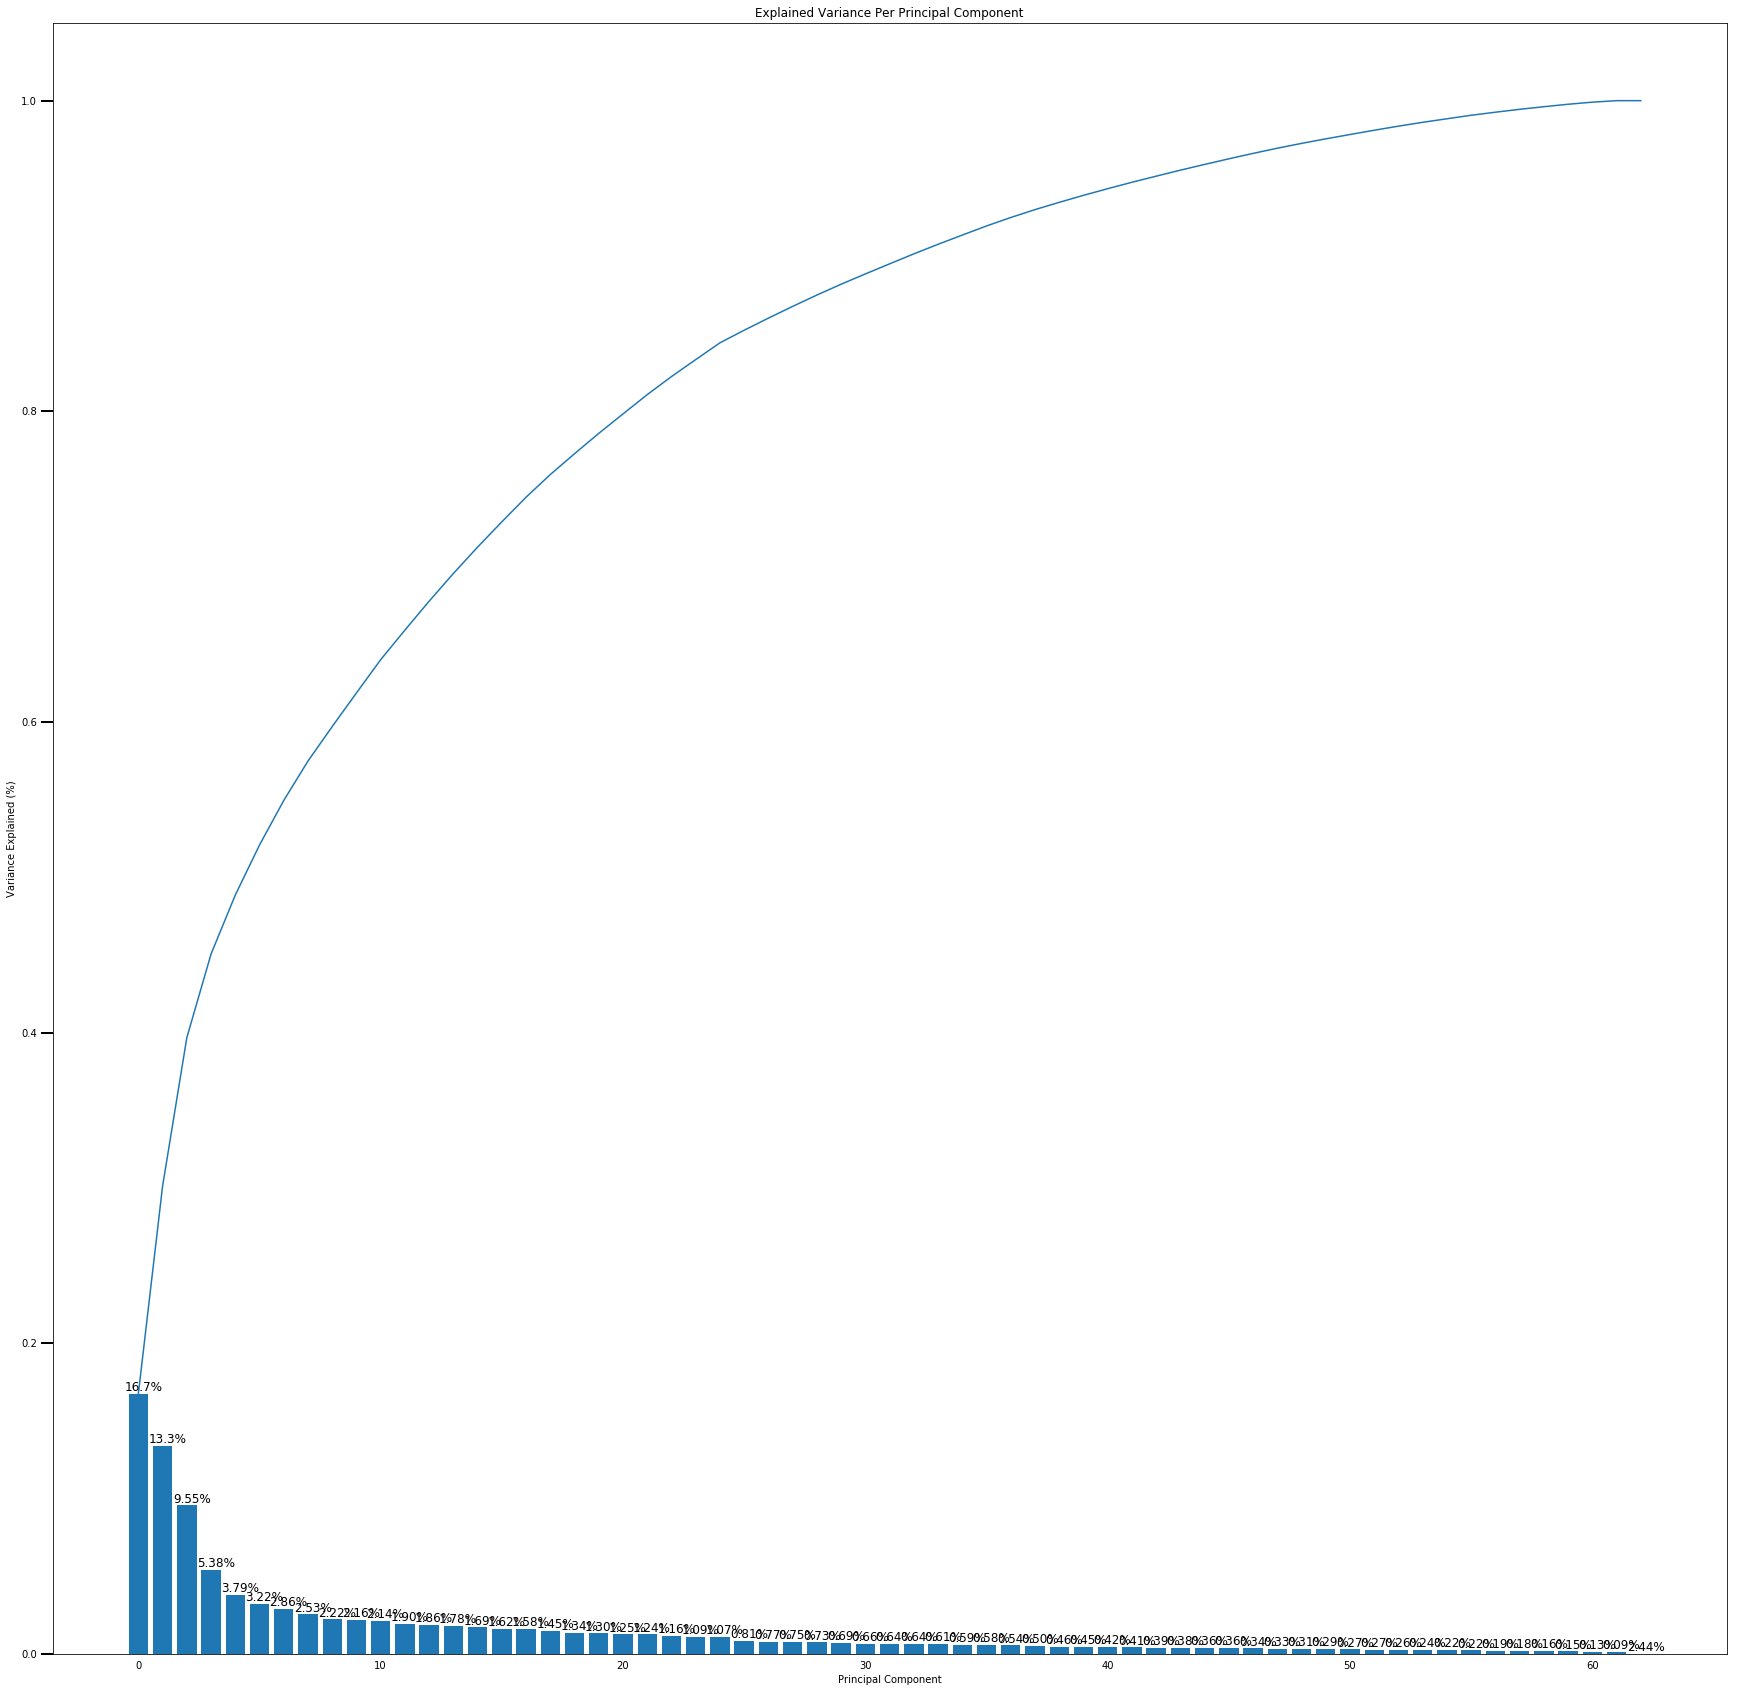

In [711]:
# Investigate the variance accounted for by each principal component.
#scree_plot function taken from  a lesson Screencast: Interpret PCA Results in Dimensionality Reduction and PCA

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    variabilities = []
 
    plt.figure(figsize=(30, 30))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
        variabilities.append(vals[i]*100)
        #print(vals[i]*100)
    
    print('Total number of components',len(variabilities))
    print('total variability of first 10 components is', sum(variabilities[:10]))
    print('total variability of first 20 components is', sum(variabilities[:20]))
    print('total variability of first 30 components is', sum(variabilities[:30]))
    print('total variability of first 40 components is', sum(variabilities[:40]))
    print('total variability of first 50 components is', sum(variabilities[:50]))
    print('total variability of first 60 components is', sum(variabilities[:60]))
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

In [712]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_30 = PCA(n_components=30)
azdias_scaled_pca_30 = pca_30.fit_transform(azdias_scaled)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

Total number of components 63

total variability of first 10 components is 61.8668437045

total variability of first 20 components is 78.5785751348

total variability of first 30 components is 88.1812928857

total variability of first 40 components is 93.9040304584

total variability of first 50 components is 97.5416756981

total variability of first 60 components is 99.7687060483

we have choosen 30 (out of 60) components as it gives 88.1812928857% of variability. We have thus reduced the number of components by half.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [713]:
print('first component', sorted(pca_30.components_[0], reverse=True))
#print('second component', sorted(pca_30.components_[1], reverse=True))
#print('third component', sorted(pca_30.components_[2], reverse=True))

first component [0.23097054654234478, 0.22261592051460971, 0.2095809578245976, 0.20595975889760851, 0.2018644939259798, 0.19970420686569906, 0.16546402397439969, 0.15774091111690758, 0.15739295698541272, 0.14675035800488914, 0.14064446486691712, 0.13983526714323077, 0.13930282509302866, 0.13869454106935383, 0.11005780739166685, 0.10676374945336665, 0.090653188316959829, 0.083736410184676049, 0.076921133163978778, 0.074589164665896143, 0.069190448703378385, 0.068952616850470272, 0.067609519329141804, 0.06327986696288064, 0.061336832064671311, 0.042736360639125677, 0.042173479137089014, 0.042148860855076797, 0.040763351008162078, 0.03982782925571491, 0.036289134128337411, 0.035318038370298212, 0.024842775742159588, 0.013670417385437814, 0.0089945135598203177, 0.0068503071363871047, -0.002059792051163909, -0.004022390009161411, -0.013995591061754424, -0.040729432666127899, -0.049103774190365768, -0.049131781814129798, -0.055735706223056944, -0.059432898467656897, -0.06904800344579215, -0.

In [714]:
def feature_weights(pca, i):
    frame = pd.DataFrame(pca_30.components_, columns=azdias_scaled.columns.values.tolist())
    #print('frame', frame)
    weights = frame.iloc[i].sort_values(ascending=False) #increasing order
    #print('weights', weights)
    return weights

In [715]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

pca_weight_0 = feature_weights(pca_30, 0)
print(pca_weight_0)

PLZ8_ANTG3                        0.230971
PLZ8_ANTG4                        0.222616
CAMEO_INTL_2015_Wealth            0.209581
HH_EINKOMMEN_SCORE                0.205960
ORTSGR_KLS9                       0.201864
EWDICHTE                          0.199704
FINANZ_HAUSBAUER                  0.165464
KBA05_ANTG4                       0.157741
PLZ8_ANTG2                        0.157393
ARBEIT                            0.146750
FINANZ_SPARER                     0.140644
KBA05_ANTG3                       0.139835
ANZ_HAUSHALTE_AKTIV               0.139303
RELAT_AB                          0.138695
SEMIO_PFLICHT                     0.110058
SEMIO_REL                         0.106764
SEMIO_RAT                         0.090653
SEMIO_TRADV                       0.083736
SEMIO_MAT                         0.076921
SEMIO_FAM                         0.074589
PRAEGENDE_JUGENDJAHRE_Decade      0.069190
FINANZ_UNAUFFAELLIGER             0.068953
SEMIO_KULT                        0.067610
FINANZ_ANLE

In [716]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weight_1 = feature_weights(pca_30, 1)
print(pca_weight_1)

ALTERSKATEGORIE_GROB              0.251704
SEMIO_ERL                         0.240863
FINANZ_VORSORGER                  0.234463
SEMIO_LUST                        0.186404
RETOURTYP_BK_S                    0.164187
SEMIO_KRIT                        0.124441
SEMIO_KAEM                        0.121919
FINANZ_HAUSBAUER                  0.115349
W_KEIT_KIND_HH                    0.113332
ANREDE_KZ                         0.102026
EWDICHTE                          0.084812
PLZ8_ANTG3                        0.084418
ORTSGR_KLS9                       0.083282
PLZ8_ANTG4                        0.081645
SEMIO_DOM                         0.078566
FINANZ_MINIMALIST                 0.067195
CAMEO_INTL_2015_Wealth            0.067104
KBA05_ANTG4                       0.066529
ARBEIT                            0.061475
WOHNDAUER_2008                    0.061071
RELAT_AB                          0.060007
PLZ8_ANTG2                        0.058648
ANZ_HAUSHALTE_AKTIV               0.058599
HH_EINKOMME

In [717]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weight_2 = feature_weights(pca_30, 2)
print(pca_weight_2)

SEMIO_VERT                        0.343971
SEMIO_SOZ                         0.258274
SEMIO_FAM                         0.242759
SEMIO_KULT                        0.225470
FINANZ_MINIMALIST                 0.159485
RETOURTYP_BK_S                    0.116666
FINANZ_VORSORGER                  0.110714
W_KEIT_KIND_HH                    0.089666
ALTERSKATEGORIE_GROB              0.086515
SEMIO_LUST                        0.073831
SEMIO_REL                         0.059515
ORTSGR_KLS9                       0.049761
EWDICHTE                          0.049164
GREEN_AVANTGARDE                  0.048344
PRAEGENDE_JUGENDJAHRE_Movement    0.048344
SEMIO_MAT                         0.048190
PLZ8_ANTG4                        0.048185
PLZ8_ANTG3                        0.047671
ARBEIT                            0.036427
WOHNDAUER_2008                    0.035794
RELAT_AB                          0.033863
PLZ8_ANTG2                        0.032224
KBA05_ANTG4                       0.030430
CAMEO_INTL_

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)


From PC_1 we can say that,
PLZ8_ANTG3, PLZ8_ANTG4, CAMEO_INTL_2015_Wealth, HH_EINKOMMEN_SCORE, ORTSGR_KLS9 ,EWDICHTE are strong postive features.
KBA05_ANTG1, PLZ8_ANTG1, MOBI_REGIO, FINANZ_MINIMALIST are strong neagative features.
Its all about family houses and household net income and movement patterns.

From PC_2 we can say that,
ALTERSKATEGORIE_GROB, FINANZ_VORSORGER, SEMIO_ERL, SEMIO_LUST, RETOURTYP_BK_S, FINANZ_HAUSBAUER  are strong positive features.
FINANZ_ANLEGER, SEMIO_PFLICHT, SEMIO_TRADV, FINANZ_UNAUFFAELLIGER, FINANZ_SPARER, SEMIO_REL, PRAEGENDE_JUGENDJAHRE_Decade are strong neagative features.
It's all about Personality typology and Financial typology.


From PC_3 we can say that,
SEMIO_VERT, SEMIO_SOZ, SEMIO_FAM, SEMIO_KULT, FINANZ_MINIMALIST are strong features.
SEMIO_ERL, SEMIO_RAT, SEMIO_KRIT, SEMIO_DOM, SEMIO_KAEM, ANREDE_KZ are strong neagative features.
It's all about Personality typology and Financial typology and gender.



## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [718]:
#code taken from Screencast in lesson 1: Clustering
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

for 1 clusters, the average within-cluster distances = 55.54536781639638
for 2 clusters, the average within-cluster distances = 47.626509092136736
for 3 clusters, the average within-cluster distances = 43.60389324795062
for 4 clusters, the average within-cluster distances = 41.06912795944154
for 5 clusters, the average within-cluster distances = 39.18213571780303
for 6 clusters, the average within-cluster distances = 37.671334234239815
for 7 clusters, the average within-cluster distances = 36.27250102364857
for 8 clusters, the average within-cluster distances = 35.231983198815044
for 9 clusters, the average within-cluster distances = 34.474739706268146


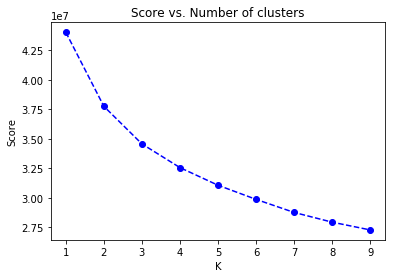

In [313]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

scores = []
centers = list(range(1,10))
#centers = list(range(1,30)) # kernel is busy for so long can't find the best cluster by running for more clusters 
#so preferred to run from 1 to 30.

for center in centers:
    score = get_kmeans_score(azdias_scaled_pca_30, center)
    print("for {} clusters, the average within-cluster distances = {}".format(center , score/azdias_scaled_pca_30.shape[0]))
    scores.append(get_kmeans_score(azdias_scaled_pca_30, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Score');
plt.title('Score vs. Number of clusters');

In [719]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters = 5)
model_clusters_5 = kmeans.fit(azdias_scaled_pca_30)
azdias_prediction = model_clusters_5.predict(azdias_scaled_pca_30)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

Through elbow method we can say that 5 clusters should be a good decision. 

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [540]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')

In [720]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_processed = clean_data(customers)

shape before dropping (191652, 85)
shape after dropping (191652, 79)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


azdias_lessthan_15's shape before dropping (140954, 79)
azdias_lessthan_15_encoded's shape after dropping (140954, 65)


In [721]:
customers_processed.shape

(140954, 63)

In [722]:
#check if it has any missing values
customers_processed.isnull().sum()

print('Total number of missing values before imputing are:',sum(customers_processed.isnull().sum()))

#fill_missing = Imputer(strategy='most_frequent')#'median'
customers_processed_imputed = pd.DataFrame(fill_missing.transform(customers_processed), columns = customers_processed.columns)

print('Total number of missing values after imputing are:',sum(customers_processed_imputed.isnull().sum()))
#display(azdias_lessthan_15_encoded_imputed.head())

Total number of missing values before imputing are: 87698
Total number of missing values after imputing are: 0


In [725]:
customers_processed_scaled = scaler.transform(customers_processed_imputed)
customers_processed_scaled_df = pd.DataFrame(customers_processed_scaled, columns=list(customers_processed_scaled))
# PCA transformation
customers_pca = pca_30.transform(customers_processed_scaled_df)
# Predict using Kmeans model_12
customers_pred = model_clusters_5.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [726]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
customers_prediction_df = pd.DataFrame(customers_prediction, columns = ['Customers cluster'])
azdias_prediction_df = pd.DataFrame(azdias_prediction, columns = ['General Population cluster'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f811465f908>]], dtype=object)

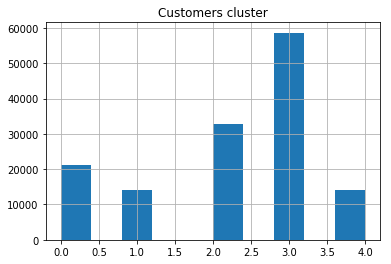

In [727]:
customers_prediction_df.hist ()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f811bb763c8>]], dtype=object)

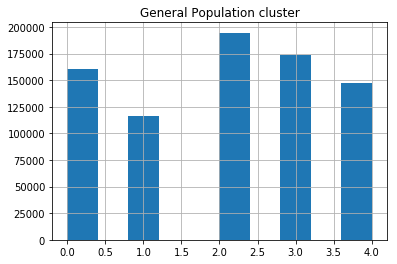

In [729]:
azdias_prediction_df.hist ()

In [731]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
centroid_3 = scaler.inverse_transform(pca_30.inverse_transform(model_clusters_5.cluster_centers_[3]))
customer_overrepresented = pd.Series(data = centroid_3, index = customers_processed.columns)
#display(customer_overrepresented)
display(customer_overrepresented.sort_values(ascending=False))

MIN_GEBAEUDEJAHR                  1993.363254
KBA13_ANZAHL_PKW                   731.203786
WOHNDAUER_2008                       8.884221
SEMIO_VERT                           6.745413
SEMIO_LUST                           5.902230
INNENSTADT                           5.575143
FINANZ_MINIMALIST                    5.312801
BALLRAUM                             4.971262
FINANZ_VORSORGER                     4.931481
SEMIO_SOZ                            4.893965
SEMIO_KULT                           4.666766
SEMIO_FAM                            4.561050
MOBI_REGIO                           4.420001
SEMIO_ERL                            4.413398
KBA05_GBZ                            4.330521
W_KEIT_KIND_HH                       4.329674
RETOURTYP_BK_S                       4.243019
GEBAEUDETYP_RASTER                   4.087981
PLZ8_GBZ                             4.046792
ORTSGR_KLS9                          4.021226
REGIOTYP                             3.807111
CAMEO_INTL_2015_Lifestage         

In [732]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_1 = scaler.inverse_transform(pca_30.inverse_transform(model_clusters_5.cluster_centers_[1]))
customer_underrepresented = pd.Series(data = centroid_1, index = customers_processed.columns)
#customer_underrepresented
display(customer_underrepresented.sort_values(ascending=False))

MIN_GEBAEUDEJAHR                  1993.015463
KBA13_ANZAHL_PKW                   653.074630
WOHNDAUER_2008                       8.284495
SEMIO_VERT                           6.927675
ANZ_HAUSHALTE_AKTIV                  6.551336
SEMIO_SOZ                            6.486657
SEMIO_KULT                           6.349696
SEMIO_FAM                            6.160247
ORTSGR_KLS9                          5.540049
SEMIO_REL                            4.964034
SEMIO_MAT                            4.747461
INNENSTADT                           4.495277
SEMIO_LUST                           4.465781
W_KEIT_KIND_HH                       4.262515
REGIOTYP                             4.222990
SEMIO_PFLICHT                        4.187877
EWDICHTE                             4.170166
BALLRAUM                             4.048242
PRAEGENDE_JUGENDJAHRE_Decade         4.034176
SEMIO_TRADV                          3.904133
FINANZ_VORSORGER                     3.792976
GEBAEUDETYP_RASTER                

In [733]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_4 = scaler.inverse_transform(pca_30.inverse_transform(model_clusters_5.cluster_centers_[4]))
customer_underrepresented = pd.Series(data = centroid_4, index = customers_processed.columns)
#customer_underrepresented
display(customer_underrepresented.sort_values(ascending=False))

MIN_GEBAEUDEJAHR                  1992.954629
KBA13_ANZAHL_PKW                   668.607707
WOHNDAUER_2008                       8.343619
SEMIO_DOM                            5.339119
ORTSGR_KLS9                          5.260000
ANZ_HAUSHALTE_AKTIV                  5.157066
SEMIO_KAEM                           5.125623
SEMIO_RAT                            4.888325
SEMIO_KRIT                           4.824605
SEMIO_MAT                            4.765908
INNENSTADT                           4.679606
SEMIO_PFLICHT                        4.570871
SEMIO_ERL                            4.515854
SEMIO_TRADV                          4.507216
SEMIO_LUST                           4.399695
BALLRAUM                             4.258581
REGIOTYP                             4.243950
SEMIO_REL                            4.222652
EWDICHTE                             3.997248
PRAEGENDE_JUGENDJAHRE_Decade         3.910313
SEMIO_KULT                           3.890844
W_KEIT_KIND_HH                    

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)


Overrepresented cluster:
Cluster 3 is overrepresented. Some characteristics of the group of population that are relative popular with the mail-order company are:

MIN_GEBAEUDEJAHR - First year building was mentioned in the database              

KBA13_ANZAHL_PKW - Number of cars in the PLZ8 region                  

Under represented Cluster:
Cluster 1, 4 are underrepresented.
Some characteristics of the group of population that are relatively not so popular with the mail-order company are:

MIN_GEBAEUDEJAHR - First year building was mentioned in the database              

KBA13_ANZAHL_PKW - Number of cars in the PLZ8 region                  


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.